In [1]:
import sys
sys.path.append("../Handlers")
from nn_image_traintest import ImageClassificationPipeline

In [2]:
icp = ImageClassificationPipeline(
    "SPAM IMAGE dataset/SpamImages/SpamImages",
    "SPAM IMAGE dataset/NaturalImages/NaturalImages",
)

In [3]:
# icp.load_and_preprocess_data()

[[[[252 254 251]
   [252 254 251]
   [252 254 251]
   ...
   [252 254 251]
   [252 254 251]
   [252 254 251]]

  [[252 254 251]
   [252 254 251]
   [252 254 251]
   ...
   [252 254 251]
   [252 254 251]
   [252 254 251]]

  [[252 254 251]
   [252 254 251]
   [252 254 251]
   ...
   [252 254 251]
   [252 254 251]
   [252 254 251]]

  ...

  [[252 254 251]
   [252 254 251]
   [252 254 251]
   ...
   [252 254 251]
   [252 254 251]
   [252 254 251]]

  [[252 254 251]
   [252 254 251]
   [252 254 251]
   ...
   [252 254 251]
   [252 254 251]
   [252 254 251]]

  [[252 254 251]
   [252 254 251]
   [252 254 251]
   ...
   [252 254 251]
   [252 254 251]
   [252 254 251]]]


 [[[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0

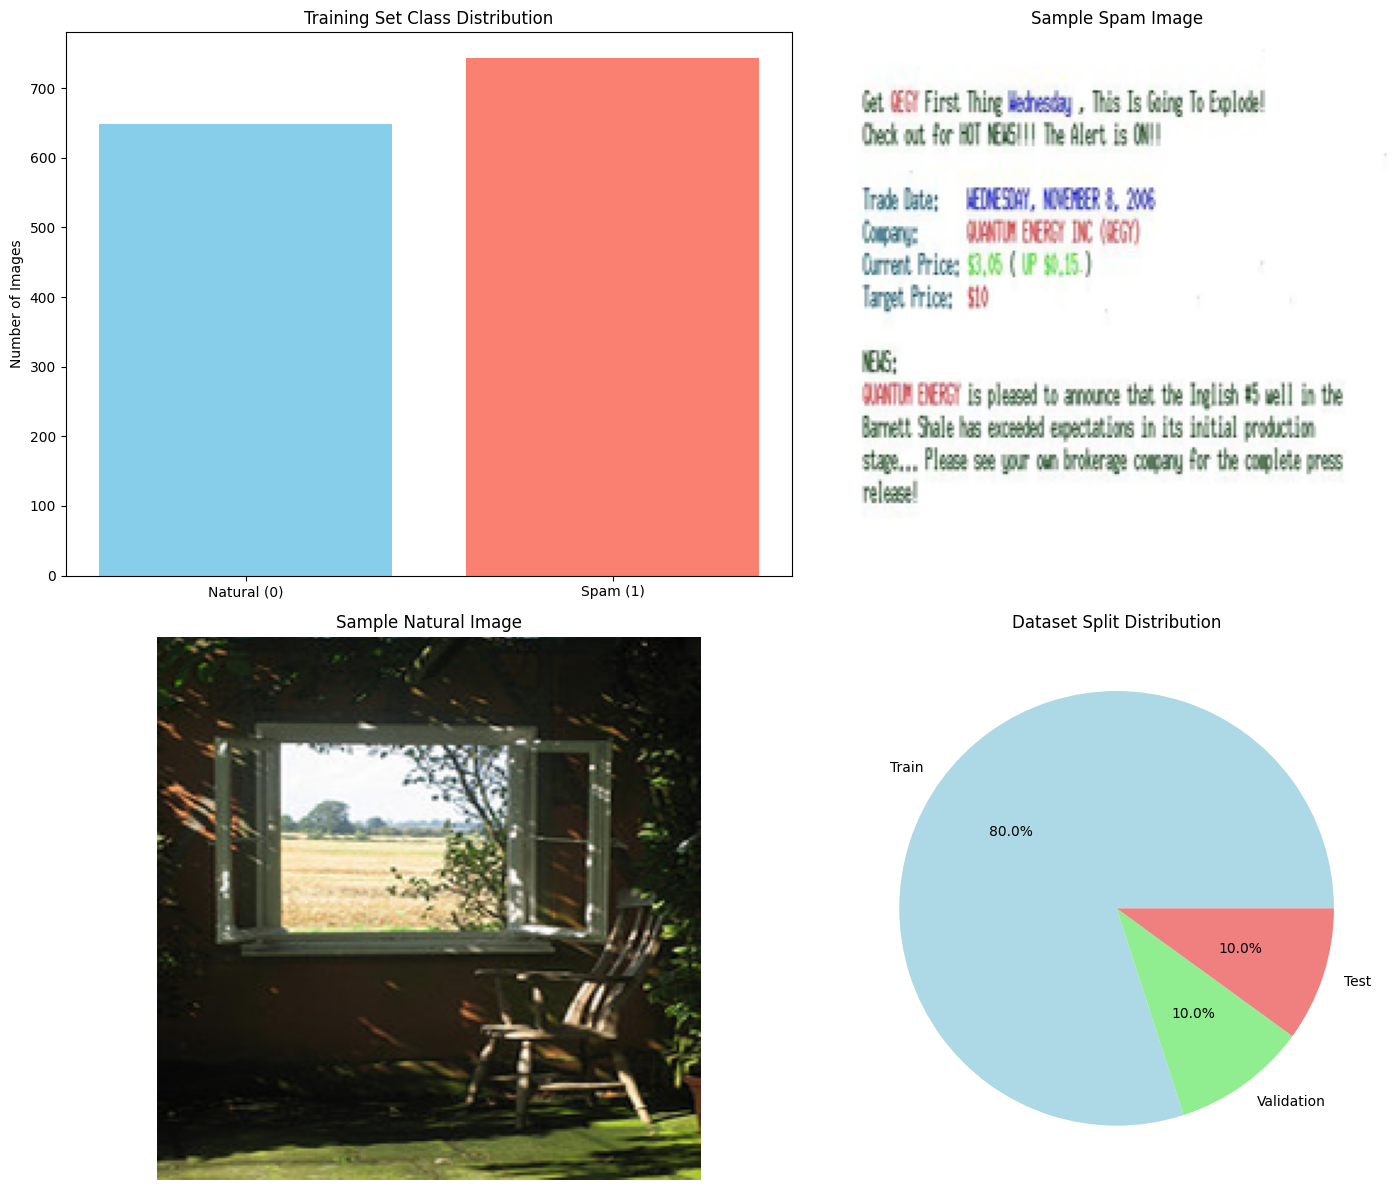

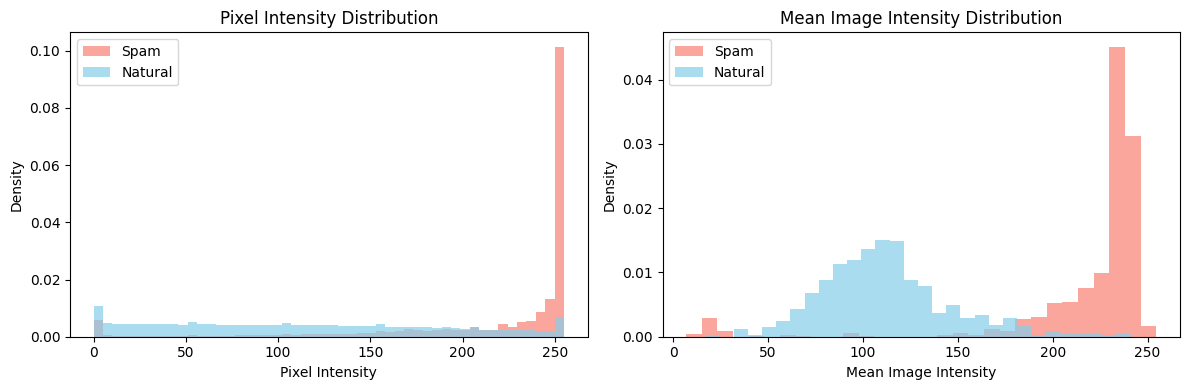

In [4]:
import numpy as np
X = np.load("./data/data_X.npy")
y = np.load("./data/data_y.npy")

print(X)
print(y)

icp.split_data(X, y)
icp.visualize_data_distribution()

In [5]:
resnet = icp.build_resnet50()
icp.train_model(resnet, "ResNet")

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,850,113 (90.98 MB)

 Trainable params: 262,401 (1.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)


Training ResNet...
Epoch 1/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.9247 - loss: 0.2099 - val_accuracy: 1.0000 - val_loss: 0.0125
Epoch 2/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 70s 2s/step - accuracy: 0.9838 - loss: 0.0568 - val_accuracy: 1.0000 - val_loss: 0.0070
Epoch 3/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 74s 2s/step - accuracy: 0.9869 - loss: 0.0399 - val_accuracy: 1.0000 - val_loss: 0.0048
Epoch 4/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 68s 2s/step - accuracy: 0.9929 - loss: 0.0290 - val_accuracy: 1.0000 - val_loss: 0.0063
Epoch 5/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 69s 2s/step - accuracy: 0.9914 - loss: 0.0283 - val_accuracy: 1.0000 - val_loss: 0.0023
Epoch 6/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 71s 2s/step - accuracy: 0.9912 - loss: 0.0236 - val_accuracy: 1.0000 - val_loss: 0.0040
Epoch 7/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 69s 2s/step - accuracy: 0.9975 - loss: 0.0173 - val_accuracy: 1.0000 - val_loss: 0.0023
Epoch 8/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 71s 2s/step - accuracy: 0.9993 - loss: 0.0069 - val_accuracy

In [7]:
resnet.save("./model/ResNet50_image_clsfy.keras")

In [8]:
mobilenet = icp.build_mobilenet()
icp.train_model(mobilenet, "MobileNet")

4334752/4334752 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ MobileNetV3Small (Functional)   │ (None, 7, 7, 576)      │       939,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 576)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,013,105 (3.86 MB)

 Trainable params: 73,985 (289.00 KB)

 Non-trainable params: 939,120 (3.58 MB)


Training MobileNet...
Epoch 1/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 12s 162ms/step - accuracy: 0.8565 - loss: 0.3464 - val_accuracy: 0.9943 - val_loss: 0.0375
Epoch 2/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 124ms/step - accuracy: 0.9812 - loss: 0.0672 - val_accuracy: 0.9885 - val_loss: 0.0222
Epoch 3/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 128ms/step - accuracy: 0.9838 - loss: 0.0498 - val_accuracy: 0.9885 - val_loss: 0.0179
Epoch 4/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 127ms/step - accuracy: 0.9830 - loss: 0.0376 - val_accuracy: 1.0000 - val_loss: 0.0089
Epoch 5/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 126ms/step - accuracy: 0.9902 - loss: 0.0292 - val_accuracy: 1.0000 - val_loss: 0.0067
Epoch 6/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 126ms/step - accuracy: 0.9898 - loss: 0.0287 - val_accuracy: 1.0000 - val_loss: 0.0053
Epoch 7/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 127ms/step - accuracy: 0.9948 - loss: 0.0198 - val_accuracy: 1.0000 - val_loss: 0.0034
Epoch 8/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 125ms/step - accuracy: 0.9963 - loss: 0

In [9]:
mobilenet.save("./model/MobileNet_image_clsfy.keras")

In [10]:
vgg16 = icp.build_vgg16()
icp.train_model(vgg16, "VGG16")

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 21s 0us/step

Training VGG16...
Epoch 1/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 179s 4s/step - accuracy: 0.8774 - loss: 0.8832 - val_accuracy: 0.9943 - val_loss: 0.0118
Epoch 2/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 177s 4s/step - accuracy: 0.9726 - loss: 0.2018 - val_accuracy: 0.9885 - val_loss: 0.0218
Epoch 3/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 175s 4s/step - accuracy: 0.9660 - loss: 0.1359 - val_accuracy: 0.9885 - val_loss: 0.0113
Epoch 4/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 175s 4s/step - accuracy: 0.9808 - loss: 0.0986 - val_accuracy: 1.0000 - val_loss: 0.0082
Epoch 5/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 178s 4s/step - accuracy: 0.9836 - loss: 0.0546 - val_accuracy: 1.0000 - val_loss: 0.0061
Epoch 6/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 189s 4s/step - accuracy: 0.9847 - loss: 0.0502 - val_accuracy: 1.0000 - val_loss: 0.0071
Epoch 7/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 187s 4s/step - accuracy: 0.9832 - loss: 0.1224 - val_accuracy: 0.9943 - val_loss: 0.0109
Epoch 8/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 18

: 

In [ ]:
vgg16.save("./model/VGG16_image_clsfy.keras")